# STAT LEARNING ASSIGNMENT 7

In [28]:
#library for assignment
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(mlr)           # ML toolkit
library(caret)         # ML toolkit
library(nnet)          # class.ind() function
library(neuralnet)     # Deep Neural Networks
library(LiblineaR)     # LR Lasso (l1)
library(randomForest)  # Random Forest
library(adabag)        # Boosting
library(e1071)         # SVM
library(ggplot2)       # Visualization
library(plotly)        # 3D visualization
# Resize plot
library(repr)  # String and binary representations


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




Q1: Randomly divide data into train/test as 80/20 ( set.seed = 1)

In [29]:
#Reading in the dataset
Bank <- read.csv("../SML_Section7/data.csv")

In [30]:
#Checking the dataset
str(Bank)

'data.frame':	6819 obs. of  96 variables:
 $ Bankrupt.                                              : int  1 1 1 1 1 1 0 0 0 0 ...
 $ ROA.C..before.interest.and.depreciation.before.interest: num  0.371 0.464 0.426 0.4 0.465 ...
 $ ROA.A..before.interest.and...after.tax                 : num  0.424 0.538 0.499 0.451 0.538 ...
 $ ROA.B..before.interest.and.depreciation.after.tax      : num  0.406 0.517 0.472 0.458 0.522 ...
 $ Operating.Gross.Margin                                 : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Realized.Sales.Gross.Margin                            : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Operating.Profit.Rate                                  : num  0.999 0.999 0.999 0.999 0.999 ...
 $ Pre.tax.net.Interest.Rate                              : num  0.797 0.797 0.796 0.797 0.797 ...
 $ After.tax.net.Interest.Rate                            : num  0.809 0.809 0.808 0.809 0.809 ...
 $ Non.industry.income.and.expenditure.revenue            : num  0.303 0.304 0.30

In [31]:
dim(Bank)

[1] 6819   96

In [36]:
# Check class distribution
table(Bank$Bankrupt)


   0    1 
6599  220 

In [34]:
#Q1: Randomly divide data into train/test as 80/20 ( set.seed = 1)
set.seed(1)
inp <- sample(2, nrow(Bank), replace = TRUE, prob = c(0.8, 0.2))
training_data <- Bank[inp==1, ]
test_data <- Bank[inp==2, ]

In [43]:
# Create the formula
bank_formula <- paste(paste("Bankrupt.", sep=' + '), paste(names(training_data)[2:96], collapse=' + '), sep=' ~ ')

In [44]:
substr(bank_formula, start=1, stop=500)

[1] "Bankrupt. ~ ROA.C..before.interest.and.depreciation.before.interest + ROA.A..before.interest.and...after.tax + ROA.B..before.interest.and.depreciation.after.tax + Operating.Gross.Margin + Realized.Sales.Gross.Margin + Operating.Profit.Rate + Pre.tax.net.Interest.Rate + After.tax.net.Interest.Rate + Non.industry.income.and.expenditure.revenue + Continuous.interest.rate..after.tax. + Operating.Expense.Rate + Research.and.development.expense.rate + Cash.flow.rate + Interest.bearing.debt.interest.ra"

In [52]:
library(neuralnet)
set.seed(333)
n <- neuralnet(bank_formula,
               data = training_data,
               hidden = c(1, 30),
               err.fct = "sse",
               linear.output = FALSE,
               lifesign = 'full',
               rep = 10,
               algorithm = "rprop+",
               stepmax = 100000,
               act.fct="tanh",      # Activation function, 'logistic' or 'tanh'
                    )

hidden: 1, 30    thresh: 0.01    rep:  1/10    steps: 
   1000	min thresh: 0.0589688177210313
                                                      
   2000	min thresh: 0.0434480455312256
                                                      
   3000	min thresh: 0.0265282073710148
                                                      
   4000	min thresh: 0.0185390679962896
                                                      
   5000	min thresh: 0.0114600067872038
                                                      
   5823
	error: 85.98318
	time: 59.61 secs

hidden: 1, 30    thresh: 0.01    rep:  2/10    steps: 
    106
	error: 85.89212
	time: 1.23 secs

hidden: 1, 30    thresh: 0.01    rep:  3/10    steps: 
    105
	error: 86.00951
	time: 1.46 secs

hidden: 1, 30    thresh: 0.01    rep:  4/10    steps: 
     51
	error: 86.06448
	time: 0.57 secs

hidden: 1, 30    thresh: 0.01    rep:  5/10    steps: 
     56
	error: 1422.91176
	time: 0.66 secs

hidden: 1, 30    thresh: 0.01    rep:

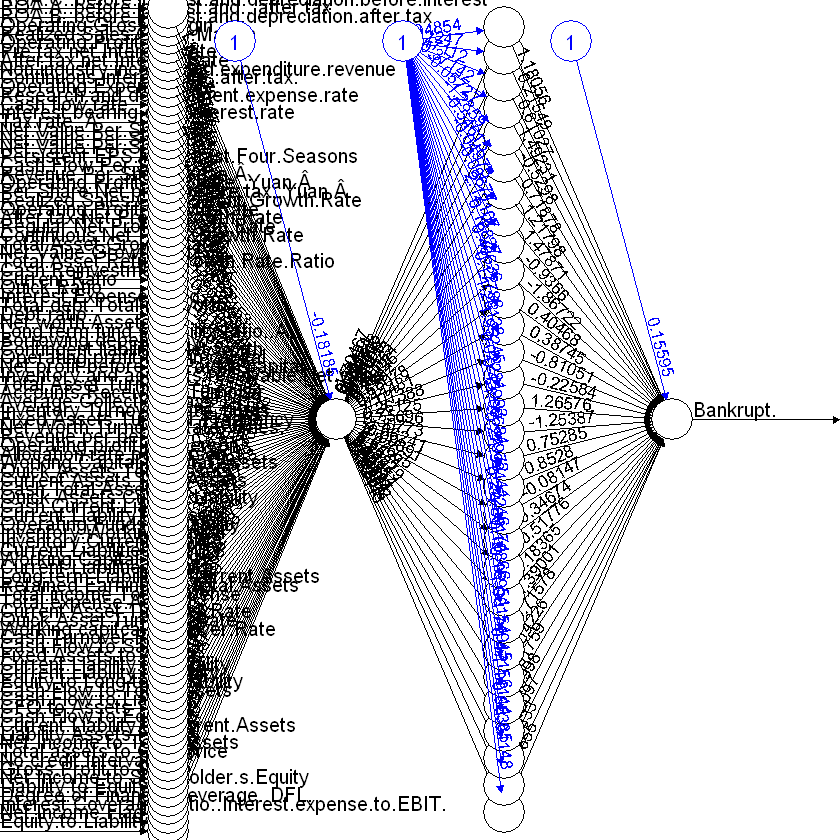

In [53]:
# plot our neural network 
plot(n, rep = 1)

In [54]:
# error
n$result.matrix

error,8.598318e+01,85.892118726,86.009508224,86.064479142,1.422912e+03,86.048301188,86.062418123,85.926935364,86.064664750,86.060853678
reached.threshold,9.374698e-03,0.002778215,0.002061679,0.009191643,1.544954e-04,0.008540195,0.008152858,0.008586665,0.003747168,0.008082419
steps,5.823000e+03,106.000000000,105.000000000,51.000000000,5.600000e+01,120.000000000,63.000000000,631.000000000,322.000000000,150.000000000
Intercept.to.1layhid1,-1.818471e-01,0.244721694,-0.068233534,-0.317982357,7.511646e-01,-0.124947028,0.328353644,1.374979966,1.310586519,0.821025292
ROA.C..before.interest.and.depreciation.before.interest.to.1layhid1,1.930120e+00,-1.366053005,-3.208403988,0.484847903,6.630156e-01,-0.405727053,0.497713763,-1.073154230,-0.940338349,1.964715369
ROA.A..before.interest.and...after.tax.to.1layhid1,-1.994787e+00,-1.661401328,-0.411657987,-0.024893331,-1.079802e+00,-1.767028047,0.072599841,0.914961570,-6.184264629,0.915175461
ROA.B..before.interest.and.depreciation.after.tax.to.1layhid1,2.594999e-01,-1.338104129,0.850795193,-0.314523708,-5.081291e-01,0.210581158,1.460330132,-1.892273205,-2.958720600,0.497718912
Operating.Gross.Margin.to.1layhid1,-1.569764e+00,-0.146354769,-1.053535261,-2.634732730,-1.288581e+00,-0.926153591,0.315717314,-1.474259591,-2.585838522,1.136522047
Realized.Sales.Gross.Margin.to.1layhid1,-3.129666e-01,-0.139038614,-0.999719474,0.111003063,-1.779019e+00,-0.566409245,-1.072649224,0.257646494,0.628715438,-1.174833761
Operating.Profit.Rate.to.1layhid1,1.134018e+00,-0.098960618,1.521112401,1.175178406,-1.690801e+00,-0.056647232,2.675006435,-0.985822963,0.836502098,-1.105411251
Pre.tax.net.Interest.Rate.to.1layhid1,5.345722e-01,-0.903194561,0.319914791,1.356557555,-2.154707e+00,0.189290428,1.076899730,-0.848335755,-1.435799170,-0.255727878


In [55]:
# Prediction
output <- compute(n, rep = 1, training_data[, -1])
head(output$net.result)

1,0.0321062
2,0.0321062
3,0.0321062
5,0.0321062
8,0.0321062
9,0.0321062


In [56]:
head(training_data[1, ])

,Bankrupt.,ROA.C..before.interest.and.depreciation.before.interest,ROA.A..before.interest.and...after.tax,ROA.B..before.interest.and.depreciation.after.tax,Operating.Gross.Margin,Realized.Sales.Gross.Margin,Operating.Profit.Rate,Pre.tax.net.Interest.Rate,After.tax.net.Interest.Rate,Non.industry.income.and.expenditure.revenue,⋯,Net.Income.to.Total.Assets,Total.assets.to.GNP.price,No.credit.Interval,Gross.Profit.to.Sales,Net.Income.to.Stockholder.s.Equity,Liability.to.Equity,Degree.of.Financial.Leverage..DFL.,Interest.Coverage.Ratio..Interest.expense.to.EBIT.,Net.Income.Flag,Equity.to.Liability
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,0.3705943,0.4243894,0.4057498,0.6014572,0.6014572,0.9989692,0.7968871,0.8088094,0.3026464,⋯,0.7168453,0.00921944,0.622879,0.6014533,0.8278902,0.2902019,0.02660063,0.5640501,1,0.01646874


In [57]:
# confusion Matrix $Misclassification error -Training data
output <- compute(n, rep = 1, training_data[, -1])
p1 <- output$net.result
pred1 <- ifelse(p1 > 0.5, 1, 0)
tab1 <- table(pred1, training_data$Bankrupt.)
tab1

     
pred1    0    1
    0 5219  178

In [58]:
#https://www.geeksforgeeks.org/building-a-simple-neural-network-in-r-programming/#:~:text=%20Building%20a%20Simple%20Neural%20Network%20in%20R,neural%20network%20on%20our%20data.%20We...%20More%20
1 - sum(diag(tab1)) / sum(tab1)

[1] 0.03298129

Q3: Build a deep NN model with multiple hidden layers (of your choice) and sigmoid activation function.

In [64]:
y = as.matrix(Bank[, 1])
#y[which(y=="benign")] = 0
#y[which(y=="malignant")] = 1
y = as.numeric(y)
x = as.numeric(as.matrix(Bank[,2:96]))
x = matrix(as.numeric(x),ncol=95)

In [71]:
library(deepnet)
nn <- nn.train(x, y, hidden = c(10, 20))
yy = nn.predict(nn, x)
print(head(yy))

           [,1]
[1,] 0.03266505
[2,] 0.03317967
[3,] 0.03157754
[4,] 0.03172376
[5,] 0.03170148
[6,] 0.03172376


In [72]:
yhat = matrix(0,length(yy),1)
yhat[which(yy > mean(yy))] = 1
yhat[which(yy <= mean(yy))] = 0
cm = table(y,yhat)
print(cm)

   yhat
y      0    1
  0 3089 3510
  1  124   96


In [73]:
print(sum(diag(cm))/sum(cm))

[1] 0.4670773


Q4: Build 5 other classification models and compare with the 2 previous NN models.

In [80]:
# Load the MNIST data (Kaggle version)
data <- read.csv("../SML_Section7/data.csv", header=T, stringsAsFactors=F)
show_digit <- function(arr784, col=gray(12:1/12), ...) {
    "
    This function create a handwritten number from the input array of 784 pixels.
    Input: 1-D array, length=784 (28 pixels x 28 pixels).
    Output: the handwritten picture.
    "
    image(matrix(arr784, nrow=28)[, 28:1], col=col, ...)
}

In [81]:
head(data, 1)

,Bankrupt.,ROA.C..before.interest.and.depreciation.before.interest,ROA.A..before.interest.and...after.tax,ROA.B..before.interest.and.depreciation.after.tax,Operating.Gross.Margin,Realized.Sales.Gross.Margin,Operating.Profit.Rate,Pre.tax.net.Interest.Rate,After.tax.net.Interest.Rate,Non.industry.income.and.expenditure.revenue,⋯,Net.Income.to.Total.Assets,Total.assets.to.GNP.price,No.credit.Interval,Gross.Profit.to.Sales,Net.Income.to.Stockholder.s.Equity,Liability.to.Equity,Degree.of.Financial.Leverage..DFL.,Interest.Coverage.Ratio..Interest.expense.to.EBIT.,Net.Income.Flag,Equity.to.Liability
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,0.3705943,0.4243894,0.4057498,0.6014572,0.6014572,0.9989692,0.7968871,0.8088094,0.3026464,⋯,0.7168453,0.00921944,0.622879,0.6014533,0.8278902,0.2902019,0.02660063,0.5640501,1,0.01646874


In [82]:
# Define the ML classification task
train_task <- mlr::makeClassifTask(id ='Bank_train', data=training_data, target='Bankrupt.')
test_task <- mlr::makeClassifTask(id='Bank_test', data=test_data, target='Bankrupt.')

In [83]:
# Logistic Regression Lasso (l1)
learner <- mlr::makeLearner('classif.LiblineaRL1LogReg')  # Register a machine learning model
model <- mlr::train(learner, train_task)
pred_test <- predict(model, task=test_task, proba=T)
performance(pred_test, measures=acc)

acc 
0.9704641

In [86]:
# k-Nearest Neighbor (k=30)
learner <- makeLearner('classif.knn', k=30)
model <- mlr::train(learner, train_task)
pred_test <- predict(model, task=test_task)
performance(pred_test, measures=acc)

acc 
0.9704641

In [87]:
# LDA (drop zero-variance features)
learner <- makeLearner('classif.lda')
model <- mlr::train(learner, filterFeatures(train_task, method='variance', threshold=0.1))
#model <- mlr::train(learner, train_task)
pred_test <- predict(model, task=test_task)
performance(pred_test, measures=acc)

acc 
0.9620253

In [88]:
# Decision Tree
learner <- mlr::makeLearner('classif.rpart')  # Register a machine learning model
model <- mlr::train(learner, train_task)
pred_test <- predict(model, task=test_task)
performance(pred_test, measures=acc)

acc 
0.9683544

In [89]:
# Random Forest
learner <- makeLearner('classif.randomForest')
model <- mlr::train(learner, train_task)
pred_test <- predict(model, task=test_task)
performance(pred_test, measures=acc)

acc 
0.9739803